# PCA

PCA  can  be  implemented  very  simply  in  Matlab  or  Python.   Given  a  dataset  (as  amatrix X), the covariance matrix can be found using the Matlab covariance function (cov(X)).Then, the eigenvectors and eigenvalues of this covariance matrix are the principal component(vectors) and principal values respectively.  The eigenvalues reflect the amount of variance accounted  for  by  each  principal  component  and  are  ordered.   To  perform  dimensionality reduction (e.g.  down to 2 dimensions), we need to multiply X by the two eigenvectors with the largest corresponding eigen values.

In [41]:
import numpy as np
def PCA(X, n_components=2):
    cov_X = np.cov(X, rowvar=False)
    eig_val, eig_vect = np.linalg.eig(cov_X)
    eig_inds = np.flip(np.argsort(eig_val))
    return np.matmul(X, eig_vect[:,eig_inds[:n_components]]), np.take_along_axis(eig_val,eig_inds,axis=0)
    

In [2]:
from scipy.io import loadmat

In [3]:
mnist = loadmat('mnist_train.mat')

In [4]:
X = mnist['train_X']
Y = mnist['train_labels']

For the MNIST dataset, run your PCA function on the data. 


In [42]:
reduced_X, eig_vals = PCA(X, n_components=2)

In [43]:
import matplotlib.pyplot as plt
colour_set = np.array(['r','g','b','k','c','y','m','#fcba03', '#03c2fc', '#ff0345'])
cY = Y-1

1. Produce a plot of the data in the space spanned by the first two principal components.  Colour each point by its class.

Text(0, 0.5, 'Second Principal Component')

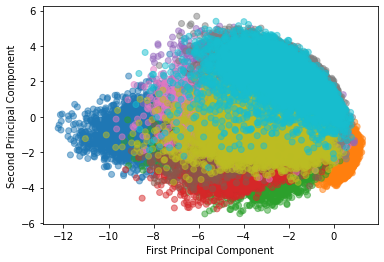

In [44]:
plt.scatter(reduced_X[:,0], reduced_X[:,1],c=cY[:,0], cmap='tab10', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

2. What percentage of the data variance is accounted for by the first two principal components?

In [57]:
eig_vals[:2].sum() / eig_vals.sum()

0.1680058841880837

3. From the results, produce a Scree graph similar to that shown in Fig 6.2 of theAlpaydin text.

Text(0.5, 1.0, 'Scree Graph')

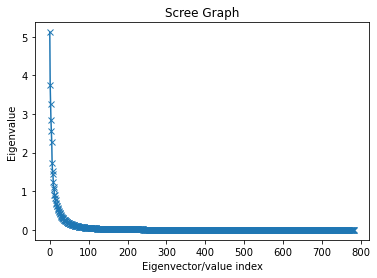

In [49]:
plt.plot(eig_vals, '-x')
plt.xlabel('Eigenvector/value index')
plt.ylabel('Eigenvalue')
plt.title('Scree Graph')

Text(0, 0.5, 'Proportion of Variance')

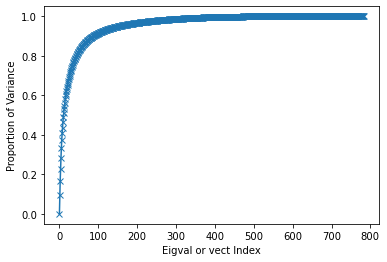

In [58]:
eig_var_prop = []
for i in range(eig_vals.shape[0]):
    eig_var_prop.append(eig_vals[:i].sum()/eig_vals.sum())
plt.plot(eig_var_prop,'-x')
plt.xlabel('Eigval or vect Index')
plt.ylabel('Proportion of Variance')

Repeat the procedure above using the Swissroll and Diabetes datasets.  For MNIST,compare a plot visualising only 2 digits with a plot visualising 10 digits.

# t-SNE
Run the t-SNE algorithm on 6000 datapoints from the MNIST dataset:
2. load(’mnist_train.mat’);
3. idx = unidrnd(60000, 6000, 1);
4. x = train_X(idx, :);
5. labels = train_labels(idx);
6. tsne(x, labels, 2, 30, 30)

In one or two sentences, explain how t-SNE differs from SNE.

In one or two sentences, explain lines 3, 4 and 5 in the code snippet above.

Provide a screenshot of the 2-dimensional visualisation after 300 iterations.  Plot theerror at each iteration up to 300 iterations in steps of 10.

In  3-4  sentences,  explain  lines  51-53  and  lines  87-89  in  tsnep.m  in  relation  to  anyfeatures you observe in your plot.  Why has the code been written in this way?  (Hint- read the paper).

Comment out lines 51-53 and 87-89.  Run t-SNE for 300 iterations for perplexity valuesranging from 10 to 300 in steps of 10.  Produce a 3D plot with perplexity and iterationson the horizontal axis and cost on the vertical axis.

After consulting your plot, comment on the following statement:A lower cost valuealways produces a better visualisation.Choose a suitable perplexity value and providethe visualisation in 2D space after 300 iterations for your chosen perplexity.  Comparethis with your result in (Q3).

Run t-SNE (without PCA as a preprocessing step and with lines 51−53 and 87−89uncommented) on the Swissroll and Diabetes datasets.  Comment on the visualisationsit produces.  Provide the parameters you used

Additional Resources:
* How to use t-SNE Effectively - http://distill.pub/2016/misread-tsne/One of the first articles on the new research platform called Distill.
* Gradient-Based Optimization - Chapter 4.3 of Deep Learning available onlinehttp://www.deeplearningbook.org/contents/numerical.htmlWe will be revisiting gradient descent later when training neural networks